In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import sweetviz as sv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import neural_network as nn
from sklearn import model_selection
from sklearn.metrics import accuracy_score, log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing

# ----

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

%matplotlib inline



In [10]:
# importing 'bank-additional-full.csv' dataset
bd_df_add_full=pd.read_csv('bank-additional-full.csv', sep=';', skipinitialspace=True)
bd_df_add_full_1=bd_df_add_full

In [11]:
# get a view of categorical data
bd_df_add_full_1.describe(include=['object', 'category']).transpose()

count unique                top   freq
job          41188     12             admin.  10422
marital      41188      4            married  24928
education    41188      8  university.degree  12168
default      41188      3                 no  32588
housing      41188      3                yes  21576
loan         41188      3                 no  33950
contact      41188      2           cellular  26144
month        41188     10                may  13769
day_of_week  41188      5                thu   8623
poutcome     41188      3        nonexistent  35563
y            41188      2                 no  36548

In [124]:
# get a view of number and data types in dataset and also if there are any null values
print(bd_df_add_full_1.isnull().values.any())
print('--------')
# Are there any null values in the datafram >>> no
# print(bd_df_add_full_1.isnull().sum())
print('--------')
print(bd_df_add_full_1.info())

False
--------
--------
<class 'pandas.core.frame.DataFrame'>
Index: 39404 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             39404 non-null  int64  
 1   job             39404 non-null  int32  
 2   marital         39404 non-null  int32  
 3   education       39404 non-null  int32  
 4   default         39404 non-null  int32  
 5   housing         39404 non-null  int32  
 6   loan            39404 non-null  int32  
 7   contact         39404 non-null  int32  
 8   month           39404 non-null  int32  
 9   day_of_week     39404 non-null  int32  
 10  campaign        39404 non-null  int64  
 11  pdays           39404 non-null  int64  
 12  previous        39404 non-null  int64  
 13  poutcome        39404 non-null  int32  
 14  emp.var.rate    39404 non-null  float64
 15  cons.price.idx  39404 non-null  float64
 16  cons.conf.idx   39404 non-null  float64
 17  euribor3m   

In [13]:
# Are there any null values in the ndatafram >>> no
bd_df_add_full_1.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [14]:
#get number of rows and columns
bd_df_add_full_1.shape

(41188, 21)

In [15]:
# get list of column names
bd_df_add_full_1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [90]:
print ("Rows     : " ,bd_df_add_full_1.shape[0])
print ("Columns  : " ,bd_df_add_full_1.shape[1])
print ("\nFeatures : \n" ,bd_df_add_full_1.columns.tolist())
print ("\nMissing values :  ", bd_df_add_full_1.isnull().sum().values.sum())
print ("\nUnique values :  \n",bd_df_add_full_1.nunique())

Rows     :  39404
Columns  :  20

Features : 
 ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']

Missing values :   0

Unique values :  
 age                78
job                12
marital             4
education           8
default             3
housing             3
loan                3
contact             2
month              10
day_of_week         5
campaign           42
pdays              27
previous            8
poutcome            3
emp.var.rate       10
cons.price.idx     26
cons.conf.idx      26
euribor3m         316
nr.employed        11
y                   2
dtype: int64


In [91]:
# get a view of number and data types in dataset and also if there are any null values
bd_df_add_full_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39404 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             39404 non-null  int64  
 1   job             39404 non-null  int32  
 2   marital         39404 non-null  int32  
 3   education       39404 non-null  int32  
 4   default         39404 non-null  int32  
 5   housing         39404 non-null  int32  
 6   loan            39404 non-null  int32  
 7   contact         39404 non-null  int32  
 8   month           39404 non-null  int32  
 9   day_of_week     39404 non-null  int32  
 10  campaign        39404 non-null  int64  
 11  pdays           39404 non-null  int64  
 12  previous        39404 non-null  int64  
 13  poutcome        39404 non-null  int32  
 14  emp.var.rate    39404 non-null  float64
 15  cons.price.idx  39404 non-null  float64
 16  cons.conf.idx   39404 non-null  float64
 17  euribor3m       39404 non-null  floa

In [94]:
bd_df_add_full_1.describe().transpose()

count         mean         std       min       25%  \
age             39404.0    40.116105   10.460328    17.000    32.000   
job             39404.0     3.738047    3.591422     0.000     0.000   
marital         39404.0     1.169932    0.609423     0.000     1.000   
education       39404.0     3.742894    2.137201     0.000     2.000   
default         39404.0     0.209928    0.407449     0.000     0.000   
housing         39404.0     1.068470    0.985122     0.000     0.000   
loan            39404.0     0.338341    0.733042     0.000     0.000   
contact         39404.0     0.373845    0.483829     0.000     0.000   
month           39404.0     4.258375    2.315246     0.000     3.000   
day_of_week     39404.0     1.998427    1.399184     0.000     1.000   
campaign        39404.0     2.618744    2.814780     1.000     1.000   
pdays           39404.0   960.847097  190.869184     0.000   999.000   
previous        39404.0     0.178738    0.503172     0.000     0.000   
poutcome        39404.0     0.928890    0.368367     0.000     1.000   
emp.var.rate    39404.0     0.064067    1.577041    -3.400    -1.800   
cons.price.idx  39404.0    93.577538    0.583820    92.201    93.075   
cons.conf.idx   39404.0   -40.499604    4.644327   -50.800   -42.700   
euribor3m       39404.0     3.601243    1.742337     0.634     1.334   
nr.employed     39404.0  5165.986481   72.763866  4963.600  5099.100   
y               39404.0     0.116689    0.321053     0.000     0.000   

                     50%       75%       max  
age               38.000    47.000    98.000  
job                2.000     7.000    11.000  
marital            1.000     2.000     3.000  
education          3.000     6.000     7.000  
default            0.000     0.000     2.000  
housing            2.000     2.000     2.000  
loan               0.000     0.000     2.000  
contact            0.000     1.000     1.000  
month              4.000     6.000     9.000  
day_of_week        2.000     3.000     4.000  
campaign           2.000     3.000    56.000  
pdays            999.000   999.000   999.000  
previous           0.000     0.000     7.000  
poutcome           1.000     1.000     2.000  
emp.var.rate       1.100     1.400     1.400  
cons.price.idx    93.798    93.994    94.767  
cons.conf.idx    -41.800   -36.400   -26.900  
euribor3m          4.857     4.961     5.045  
nr.employed     5191.000  5228.100  5228.100  
y                  0.000     0.000     1.000

In [95]:
# checking "?" values, how many are there in the whole dataset
df_missing = (bd_df_add_full_1=='?').sum()
df_missing

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
bd_df_add_full_1['y'].value_counts()/len(bd_df_add_full_1)   #calculate percentages of values in y column (the target column)

y
0    0.883311
1    0.116689
Name: count, dtype: float64

## Remove Duration column
last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention
is to have a realistic predictive model.


In [21]:
# remove the duration column and verify its removed
bd_df_add_full_1.drop('duration', axis=1, inplace=True)
bd_df_add_full_1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [22]:
bd_df_add_full_prfrpt = ProfileReport(bd_df_add_full_1)
bd_df_add_full_prfrpt

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# create html report file 
bd_df_add_full_prfrpt.to_file('pnda_report_111.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# creating sweet viz report 
bd_svprof = sv.analyze(bd_df_add_full)
bd_svprof.show_html('sv_analysis_111.html')

In [26]:
# define numerical and categorical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
numerical_columns = ['age', 'campaign', 'pdays', 'previous']

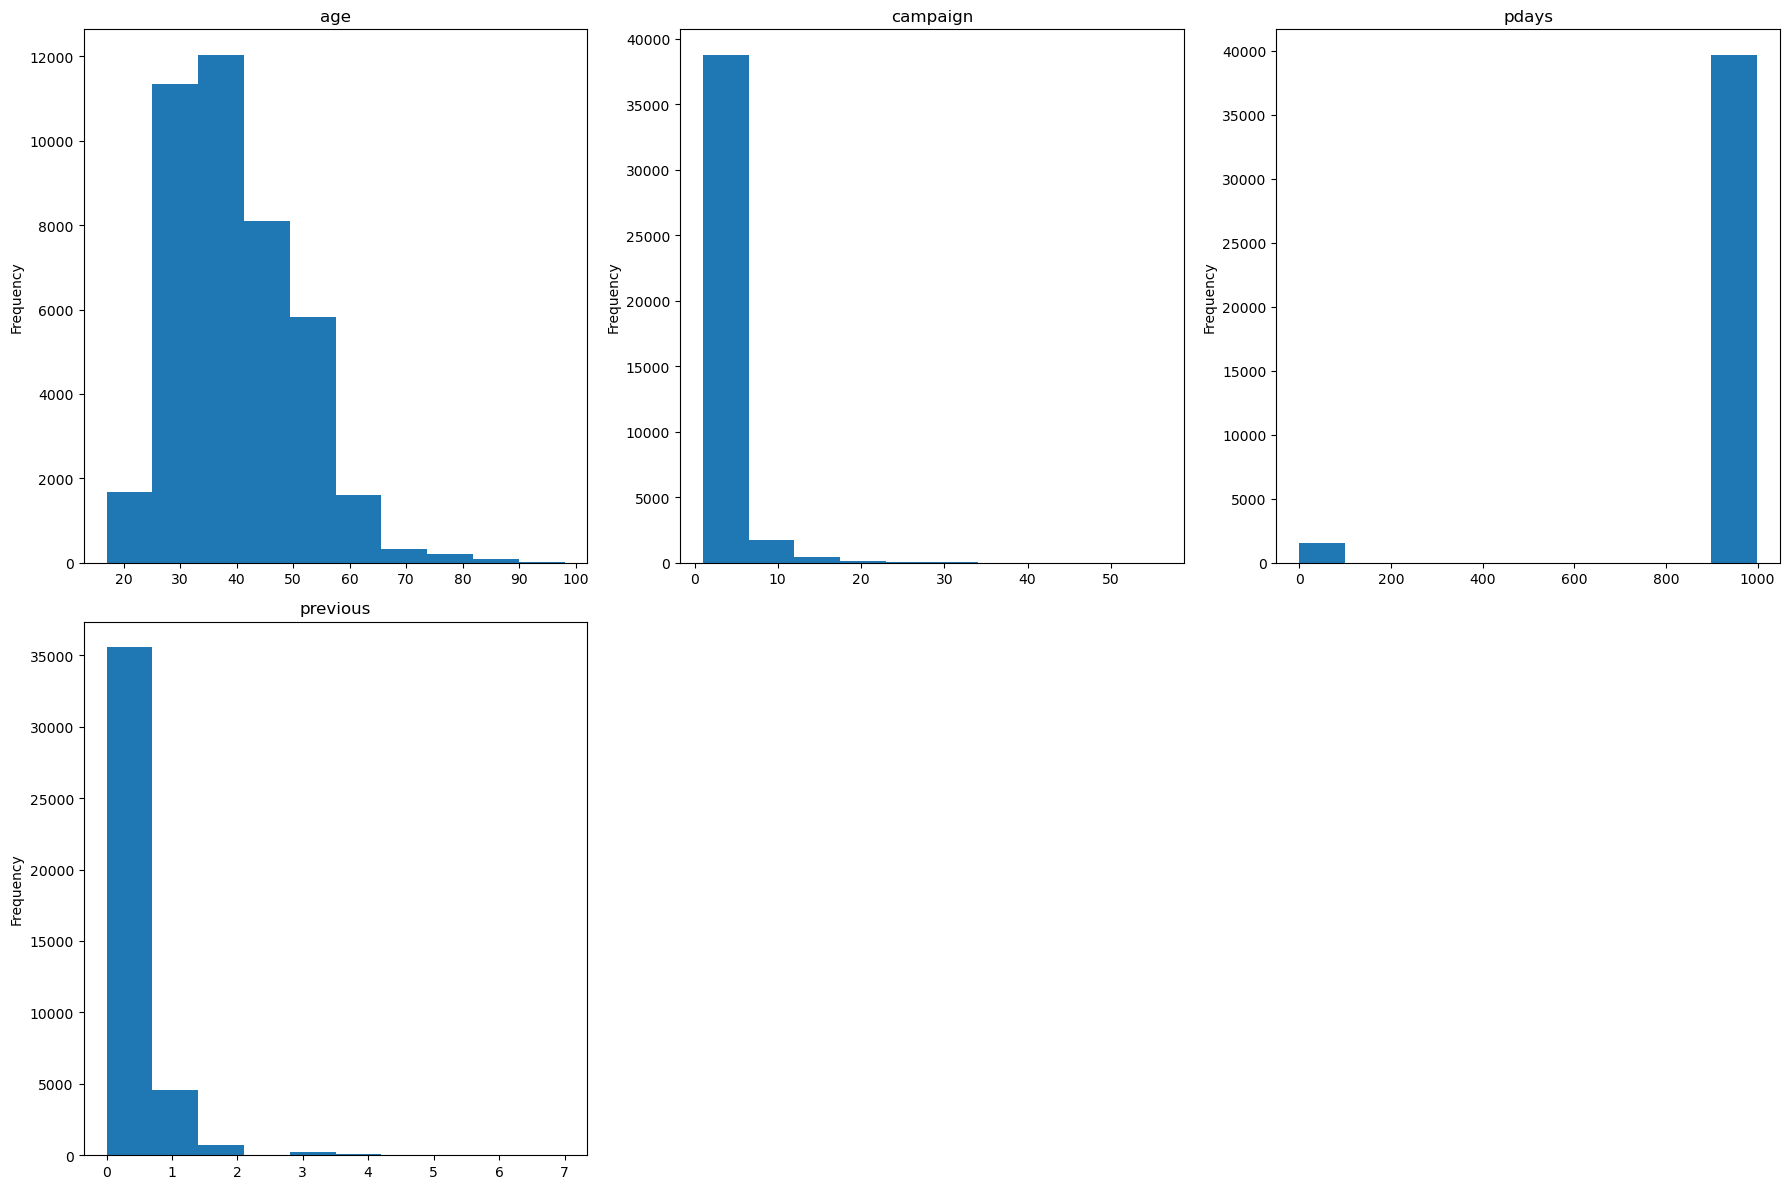

In [27]:
# Numerical Plots
n_cols = 3  # define the number of columns

# now we check if the number of columns of that type is divisible by the number
# of columns we defined
if len(numerical_columns) % n_cols == 0:  # if it is devisible (no remainder)
    n_rows = int(len(numerical_columns) / n_cols)
else:  # if it is not devisible (no remainder)
    n_rows = int(len(numerical_columns) / n_cols) + 1

# define the figure and its subplots
fig, axes = plt.subplots(nrows=n_rows,ncols=n_cols, figsize=(18, 12))

cur_col = 0 # here we'll store the current column of the plot we are at
cur_row = 0 # here we'll store the current row of the plot we are at

for column_name in numerical_columns:  # iterate over the column's names
    # define the plot passing current row and column to the axes param of the plot
    bd_df_add_full_1[column_name].plot(kind='hist', ax=axes[cur_row, cur_col], title=column_name)
    # once we add a new plot, we must move one column to the right, so we add 1 to
    # the current count of columns
    cur_col += 1
    # after, we must check we are still within the boundaries (remember that python
    # start indexing at 0)
    if cur_col == n_cols: # if we are beyond the boundary:
        cur_row += 1  # move to the next row (i.e., increment the row count)
        cur_col = 0 # reset the count of columns (i.e., position at the first column)

# remove unused axes
for ax in axes.flat[len(numerical_columns):]:
    ax.remove()       

# clean layout     
plt.tight_layout()


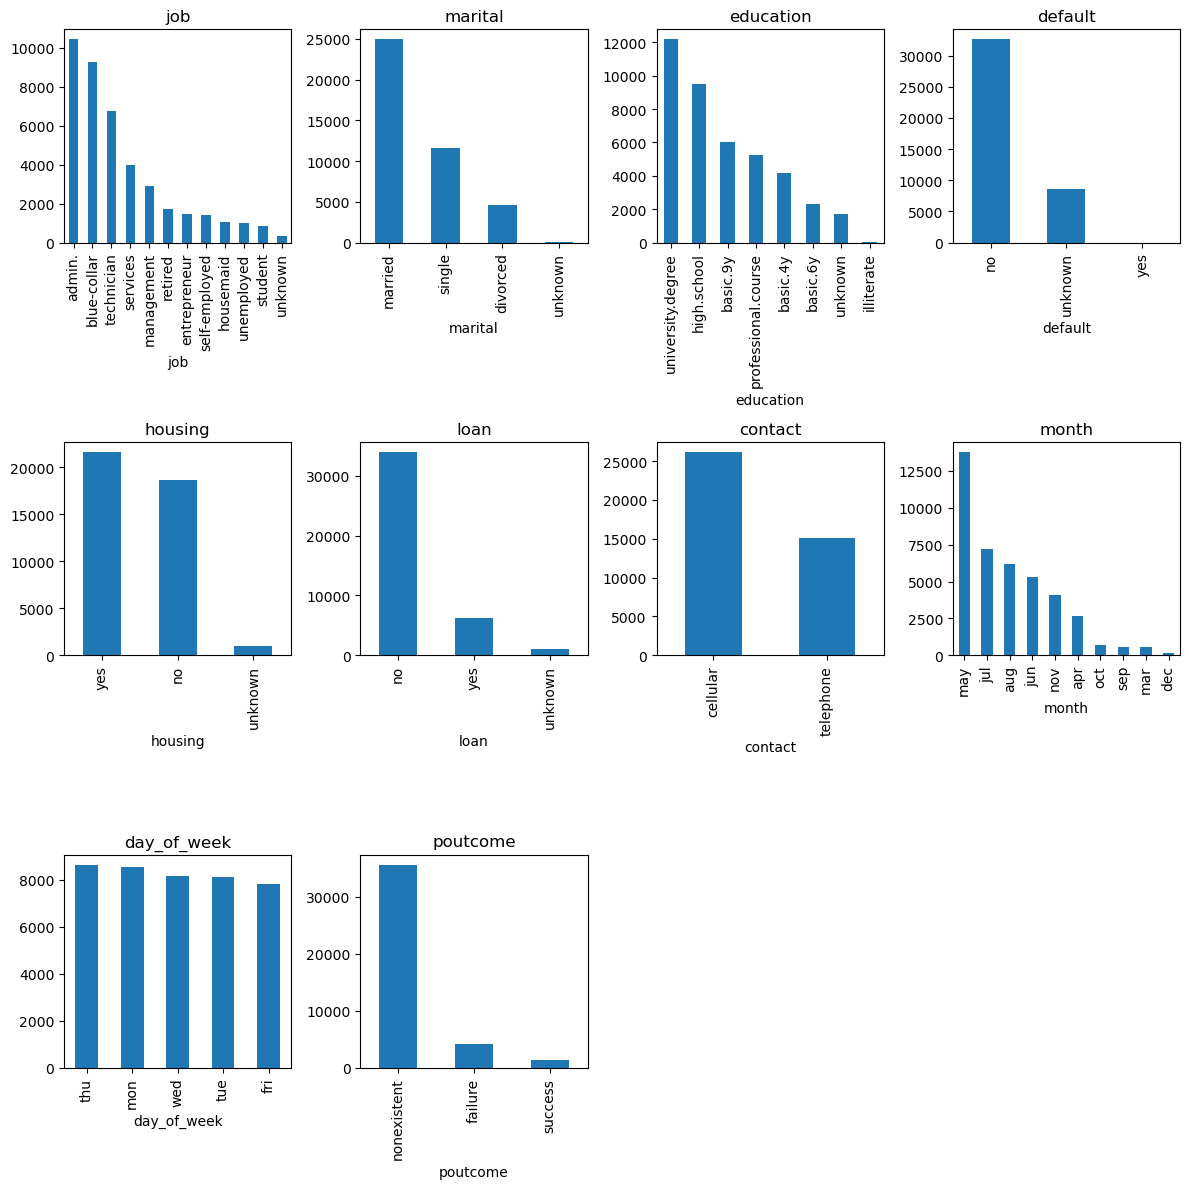

In [25]:
# Categorical Plots
# List of categorical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

n_cols = 4  # define the number of columns

# now we check if the number of columns of that type is divisible by the number
# of columns we defined
if len(categorical_columns) % n_cols == 0:  # if it is divisible (no remainder)
    n_rows = int(len(categorical_columns) / n_cols)
else:  # if it is not divisible (remainder)
    n_rows = int(len(categorical_columns) / n_cols) + 1

# define the figure and its subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 12))  # increased figsize for better view

cur_col = 0  # here we'll store the current column of the plot we are at
cur_row = 0  # here we'll store the current row of the plot we are at

# Iterate over the column's names
for column_name in categorical_columns:
    # Plot the value counts for each categorical column
    bd_df_add_full_1[column_name].value_counts().plot(kind='bar', ax=axes[cur_row, cur_col], title=column_name)
    
    # Move to the next column
    cur_col += 1
    
    # After, we must check we are still within the boundaries
    if cur_col == n_cols:  # if we are beyond the boundary:
        cur_row += 1  # move to the next row (i.e., increment the row count)
        cur_col = 0  # reset the count of columns (i.e., position at the first column)

# Remove unused axes (we are working with categorical columns here, so check for the number of categorical axes)
for ax in axes.flat[len(categorical_columns):]:
    ax.remove()

# Clean layout for a better look
plt.tight_layout()

# Display the plots
plt.show()

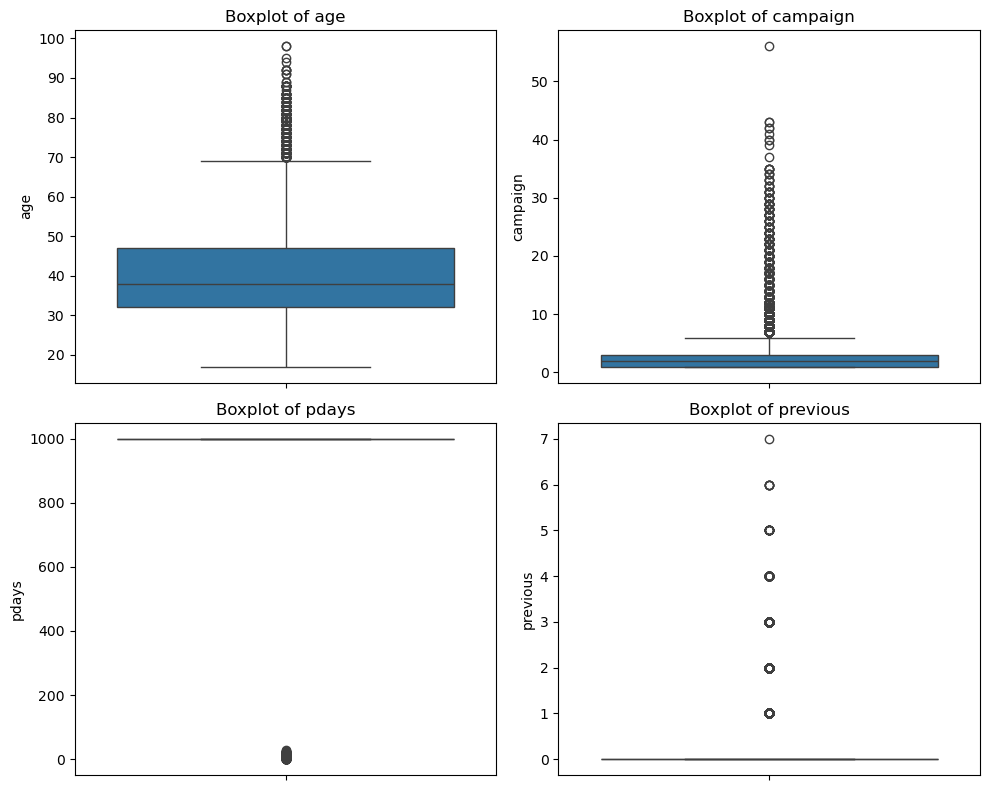

In [30]:
# Box plots


# Define the numerical columns you want to plot
numerical_columns = ['age', 'campaign', 'pdays', 'previous']  # Example numerical columns

# Define the number of columns for the subplots
n_cols = 2  # Set how many columns you want for the layout

# Check if the number of columns is divisible by the n_cols defined
if len(numerical_columns) % n_cols == 0:
    n_rows = len(numerical_columns) // n_cols
else:
    n_rows = len(numerical_columns) // n_cols + 1

# Create a figure and define subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 8))

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop over the columns and create the boxplots
for i, column_name in enumerate(numerical_columns):
    sns.boxplot(data=bd_df_add_full_1[column_name], ax=axes[i])
    axes[i].set_title(f"Boxplot of {column_name}")  # Title for each subplot

# Remove unused axes (if there are any)
for j in range(i + 1, len(axes)):
    axes[j].remove()

# Adjust layout
plt.tight_layout()
plt.show()


# Conclusions from assessing data in reports

1. There are no missing values
1. There are 12 deuplicat rows -we will remove those
1. Boxplots There are a number of outliers
    1. Age - Data is symmetric, median about 40, some outliers about 65, so older people present in data
    1. campaign - right -skewed dustribution, most data points ta lower end. Median is low, many outliers, most campaigns have a low number of contacts
    1. pdays - A lot of outliers, most data poiunts clustered at lower end, implies numbr of days since last contact is low, but there some with very high number os days also. Large number of values at 999.... 
    1. previous -right skewed with a good few outliers, generally low number of previous contacts, but some have a higher number
    1. theres a good deal of skewness and outliers in the numerical data...
1. There is no Missing Data,NaN values, 
1. 

### pdays values
from data source file bank-names.rxr it says - (numeric, -1 means client was not previously contacted)
so assuming 999 means was contacted previously but we do not have records for when. To remove this data would hugely reduce our data set so will laave it in as is and no encode as 

In [40]:
# remove duplicates
# Identify and remove duplicates, says 1784 duplicate rows--- will drop thems
# bd_df_duplicates= bd_df_add_full_1.duplicated()
# bd_df_add_full_1.duplicated().sum()

# duplicated_rows=bd_df_add_full_1[bd_df_add_full_1.duplicated(keep='first')]
# print(duplicated_rows)
# bd_df_add_full_1.shape

bd_df_add_full_1.drop_duplicates(inplace=True, keep='first')
bd_df_add_full_1.duplicated().sum()

0

In [42]:
bd_df_add_full_1.shape

(39404, 20)

### Categorical to Numerical

In [43]:
# List of categorical columns
categorical_columns = bd_df_add_full_1.select_dtypes(include=['object']).columns

# Create a dictionary to store unique values for each categorical column
unique_values_dict = {} 

for col in categorical_columns:
    unique_values_dict[col] = bd_df_add_full_1[col].unique().tolist()

# Print the dictionary to see unique values for each categorical column
for column, unique_values in unique_values_dict.items():
    print(f"Unique values for '{column}': {unique_values}")

Unique values for 'job': ['housemaid', 'services', 'admin.', 'blue-collar', 'technician', 'retired', 'management', 'unemployed', 'self-employed', 'unknown', 'entrepreneur', 'student']
Unique values for 'marital': ['married', 'single', 'divorced', 'unknown']
Unique values for 'education': ['basic.4y', 'high.school', 'basic.6y', 'basic.9y', 'professional.course', 'unknown', 'university.degree', 'illiterate']
Unique values for 'default': ['no', 'unknown', 'yes']
Unique values for 'housing': ['no', 'yes', 'unknown']
Unique values for 'loan': ['no', 'yes', 'unknown']
Unique values for 'contact': ['telephone', 'cellular']
Unique values for 'month': ['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr', 'sep']
Unique values for 'day_of_week': ['mon', 'tue', 'wed', 'thu', 'fri']
Unique values for 'poutcome': ['nonexistent', 'failure', 'success']
Unique values for 'y': ['no', 'yes']


In [ ]:
# one hot encoding from cat to num - increasingh number of columns to64, which may be too big
bd_df_add_full_one_hot = pd.get_dummies(bd_df_add_full_1, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y'])

In [55]:
bd_df_add_full_one_hot.dtypes


age                       int64
campaign                  int64
pdays                     int64
previous                  int64
emp.var.rate            float64
                         ...   
poutcome_failure           bool
poutcome_nonexistent       bool
poutcome_success           bool
y_no                       bool
y_yes                      bool
Length: 64, dtype: object

In [57]:
bd_df_numcols = bd_df_add_full_one_hot.select_dtypes(include=[float, int, bool])
print(bd_df_numcols)
# bal_cor_matrix_1=bd_df_numcols_bal_1.corr()
# # print(bal_cor_matrix_1)
# plt.figure(figsize=(12,5))
# sns.heatmap(bal_cor_matrix_1, annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title('encoded - correlations')
# plt.show()

       age  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0       56         1    999         0           1.1          93.994   
1       57         1    999         0           1.1          93.994   
2       37         1    999         0           1.1          93.994   
3       40         1    999         0           1.1          93.994   
4       56         1    999         0           1.1          93.994   
...    ...       ...    ...       ...           ...             ...   
41183   73         1    999         0          -1.1          94.767   
41184   46         1    999         0          -1.1          94.767   
41185   56         2    999         0          -1.1          94.767   
41186   44         1    999         0          -1.1          94.767   
41187   74         3    999         1          -1.1          94.767   

       cons.conf.idx  euribor3m  nr.employed  job_admin.  ...  \
0              -36.4      4.857       5191.0       False  ...   
1              -3

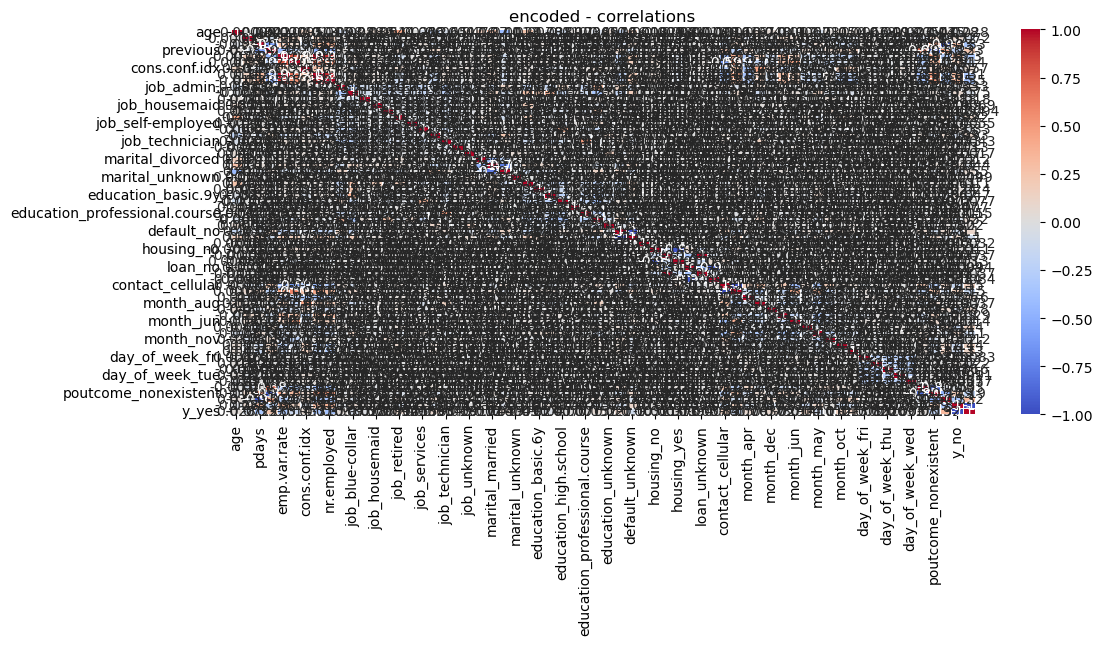

In [59]:
# Correlation
bd_df_numcols = bd_df_add_full_one_hot.select_dtypes(include=[float, int, bool])
bal_cor_matrix_1=bd_df_numcols.corr()
# print(bal_cor_matrix_1)
plt.figure(figsize=(12,5))
sns.heatmap(bal_cor_matrix_1, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('encoded - correlations')
plt.show()

In [ ]:
# Label Encoding

# Create a LabelEncoder instance
le = LabelEncoder()

# will craete a list of categories and feed it into the fit.transform
le_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

for col in le_columns:
    bd_df_add_full_1[col] = le.fit_transform(bd_df_add_full_1[col]) # Optionally replace 'unknown' with NaN for imputing

# to encode and replace unknown value use the below
# for col in binary_columns:
#     bd_df_add_full_1[col] = le.fit_transform(df[col].replace('unknown', 'NaN'))  # Optionally replace 'unknown' with NaN for imputing

In [ ]:
bd_df_add_full_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39404 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             39404 non-null  int64  
 1   job             39404 non-null  int32  
 2   marital         39404 non-null  int32  
 3   education       39404 non-null  int32  
 4   default         39404 non-null  int32  
 5   housing         39404 non-null  int32  
 6   loan            39404 non-null  int32  
 7   contact         39404 non-null  int32  
 8   month           39404 non-null  int32  
 9   day_of_week     39404 non-null  int32  
 10  campaign        39404 non-null  int64  
 11  pdays           39404 non-null  int64  
 12  previous        39404 non-null  int64  
 13  poutcome        39404 non-null  int32  
 14  emp.var.rate    39404 non-null  float64
 15  cons.price.idx  39404 non-null  float64
 16  cons.conf.idx   39404 non-null  float64
 17  euribor3m       39404 non-null  floa

In [79]:
bd_df_add_full_1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [127]:
# numerical dispaly of corelatin data
corr_matrix=bd_df_add_full_1.corr()
corr_matrix

age       job   marital  education   default   housing  \
age             1.000000 -0.000356 -0.386836  -0.116460  0.162266  0.000571   
job            -0.000356  1.000000  0.031157   0.134519 -0.026000  0.006705   
marital        -0.386836  0.031157  1.000000   0.107589 -0.077440  0.008519   
education      -0.116460  0.134519  0.107589   1.000000 -0.186238  0.015546   
default         0.162266 -0.026000 -0.077440  -0.186238  1.000000 -0.015452   
housing         0.000571  0.006705  0.008519   0.015546 -0.015452  1.000000   
loan           -0.010141 -0.011680  0.007866   0.006686 -0.004823  0.046079   
contact         0.001628 -0.026789 -0.051063  -0.103685  0.137691 -0.079424   
month          -0.029817 -0.030564 -0.004282  -0.079275 -0.015988 -0.017727   
day_of_week    -0.016941 -0.001678  0.000968  -0.017406 -0.007478  0.002159   
campaign        0.000990 -0.008250 -0.005150   0.000605  0.033276 -0.009659   
pdays          -0.033556 -0.028258 -0.039555  -0.048220  0.082248 -0.011605   
previous        0.022051  0.020854  0.041395   0.040776 -0.105409  0.022311   
poutcome        0.021908  0.011376  0.001034   0.016879  0.023879 -0.011550   
emp.var.rate    0.002199 -0.009343 -0.087202  -0.047467  0.207009 -0.062001   
cons.price.idx  0.000954 -0.016276 -0.056533  -0.080204  0.168705 -0.080134   
cons.conf.idx   0.128851  0.049890 -0.033589   0.075968  0.026672 -0.033055   
euribor3m       0.012970 -0.008895 -0.094973  -0.040293  0.199373 -0.061032   
nr.employed    -0.014800 -0.020241 -0.090113  -0.046126  0.194104 -0.047916   
y               0.028196  0.024860  0.047818   0.059333 -0.101515  0.012211   

                    loan   contact     month  day_of_week  campaign     pdays  \
age            -0.010141  0.001628 -0.029817    -0.016941  0.000990 -0.033556   
job            -0.011680 -0.026789 -0.030564    -0.001678 -0.008250 -0.028258   
marital         0.007866 -0.051063 -0.004282     0.000968 -0.005150 -0.039555   
education       0.006686 -0.103685 -0.079275    -0.017406  0.000605 -0.048220   
default        -0.004823  0.137691 -0.015988    -0.007478  0.033276  0.082248   
housing         0.046079 -0.079424 -0.017727     0.002159 -0.009659 -0.011605   
loan            1.000000 -0.014891 -0.009565    -0.007572 -0.001034  0.003266   
contact        -0.014891  1.000000  0.270305    -0.007379  0.071732  0.123625   
month          -0.009565  0.270305  1.000000     0.027193 -0.068479 -0.046932   
day_of_week    -0.007572 -0.007379  0.027193     1.000000 -0.036754 -0.010723   
campaign       -0.001034  0.071732 -0.068479    -0.036754  1.000000  0.056527   
pdays           0.003266  0.123625 -0.046932    -0.010723  0.056527  1.000000   
previous       -0.005638 -0.221002  0.100238    -0.002448 -0.084663 -0.588981   
poutcome        0.000097  0.121110 -0.062372     0.018248  0.034138 -0.479872   
emp.var.rate    0.006076  0.405636 -0.169632     0.032058  0.158225  0.273821   
cons.price.idx -0.003043  0.594026 -0.002131     0.005378  0.128093  0.080392   
cons.conf.idx  -0.013082  0.250401  0.017761     0.043289 -0.014252 -0.092785   
euribor3m       0.004396  0.411420 -0.109362     0.037721  0.142438  0.300021   
nr.employed     0.009168  0.282058 -0.214396     0.026469  0.152535  0.375664   
y              -0.009133 -0.152261 -0.010311     0.016849 -0.072371 -0.325062   

                previous  poutcome  emp.var.rate  cons.price.idx  \
age             0.022051  0.021908      0.002199        0.000954   
job             0.020854  0.011376     -0.009343       -0.016276   
marital         0.041395  0.001034     -0.087202       -0.056533   
education       0.040776  0.016879     -0.047467       -0.080204   
default        -0.105409  0.023879      0.207009        0.168705   
housing         0.022311 -0.011550     -0.062001       -0.080134   
loan           -0.005638  0.000097      0.006076       -0.003043   
contact        -0.221002  0.121110      0.405636        0.594026   
month           0.100238 -0.062372     -0.16963

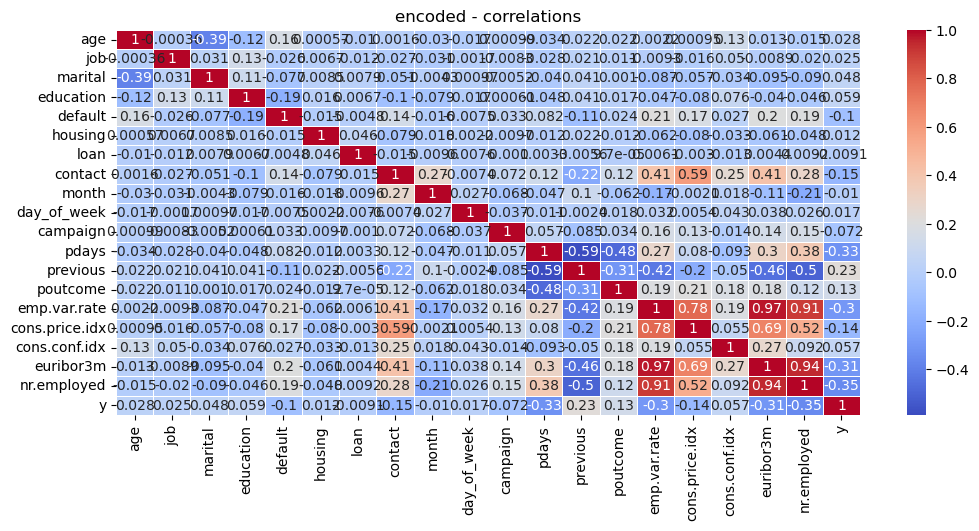

In [67]:
# Correlation
bd_df_numcols_labenc = bd_df_add_full_1.select_dtypes(include=[float, int, bool])
bal_cor_matrix_2=bd_df_numcols_labenc.corr()
# print(bal_cor_matrix_1)
plt.figure(figsize=(12,5))
sns.heatmap(bal_cor_matrix_2, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('encoded - correlations')
plt.show()

### Correlation
Most have no correlation, so no linear relationship  between variables
- **Strong Positive Correlations**:  
    - (0.97) > `emp.var.rate` and `euribor3m`  => as employment variation rate goes up euribor rate goes up
    - (0.91) > `nr.employed` and `emp.var.rate`=>  as employment variation rate goes up, the number of employees also goes up
    - (0.78) > `nr.employed` and `cons.price.idx` => as number employed goes up, consumer price index also goes up
- **Strong Negative Correlations**:
    - (-0.59) > `pdays` and `previous` => as the number of days since the client was last contacted increases, the number of previous contacts decreases.
    - (-.48) > 'pdays' and 'poutcome' => as the number of days since the client was last contacted increases, the poutcome value decreases
    - (-0.5) > `nr.employed` and `previous` => as the number of employed goes up, the number of previous contacts decreases.
    - (0.46) > `euribor3m` and `previous` => as the euriboir rate goes up, the number of previous contacts decreases.



In [ ]:
# Next, Concatenate df_categorical dataframe with original df (dataframe)

# # first, Drop earlier duplicate columns which had categorical values
# df = df.drop(df_categorical.columns,axis=1)
# df = pd.concat([df,df_categorical],axis=1)
# df.head()

## split data into train and test

In [69]:
from sklearn.model_selection import train_test_split

# Putting independent variables/features to X
#X = bd_df_add_full_1.drop('Target',axis=1)
x = bd_df_add_full_1.drop(columns=['y'])


# Putting response/dependent variable/feature to y
y = bd_df_add_full_1['y']


In [71]:
# Splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=99)



# test_size = the proportion to be used for testing.shoudl be between 0 and 1.
# randomn = Controls the shuffling of the data before splitting. If set to an integer, it ensures the split is reproducible.


# # Check the shapes of the splits
print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 27582
Test set size: 11822


In [72]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [78]:
text_representation = tree.export_text(dt_default)
print(text_representation)

|--- feature_18 <= 5087.65
|   |--- feature_13 <= 1.50
|   |   |--- feature_7 <= 0.50
|   |   |   |--- feature_15 <= 93.17
|   |   |   |   |--- feature_17 <= 0.74
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_17 >  0.74
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_15 >  93.17
|   |   |   |   |--- feature_12 <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_12 >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- feature_7 >  0.50
|   |   |   |--- feature_8 <= 0.50
|   |   |   |   |--- feature_3 <= 1.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_3 >  1.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_8 >  0.50
|   |   |   |   |--- feature_11 <= 6.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_11 >  6.50
|   |   |   |   |   |--- class: 0
|   |--- feature_13 >  1.50
|   |   |--- feature_18 <= 5020.50
|   |   |   |--- feature_9 <= 1.50
|   |   |   |   |--- feature_10 <= 6.50
|   |   |  

ndex(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

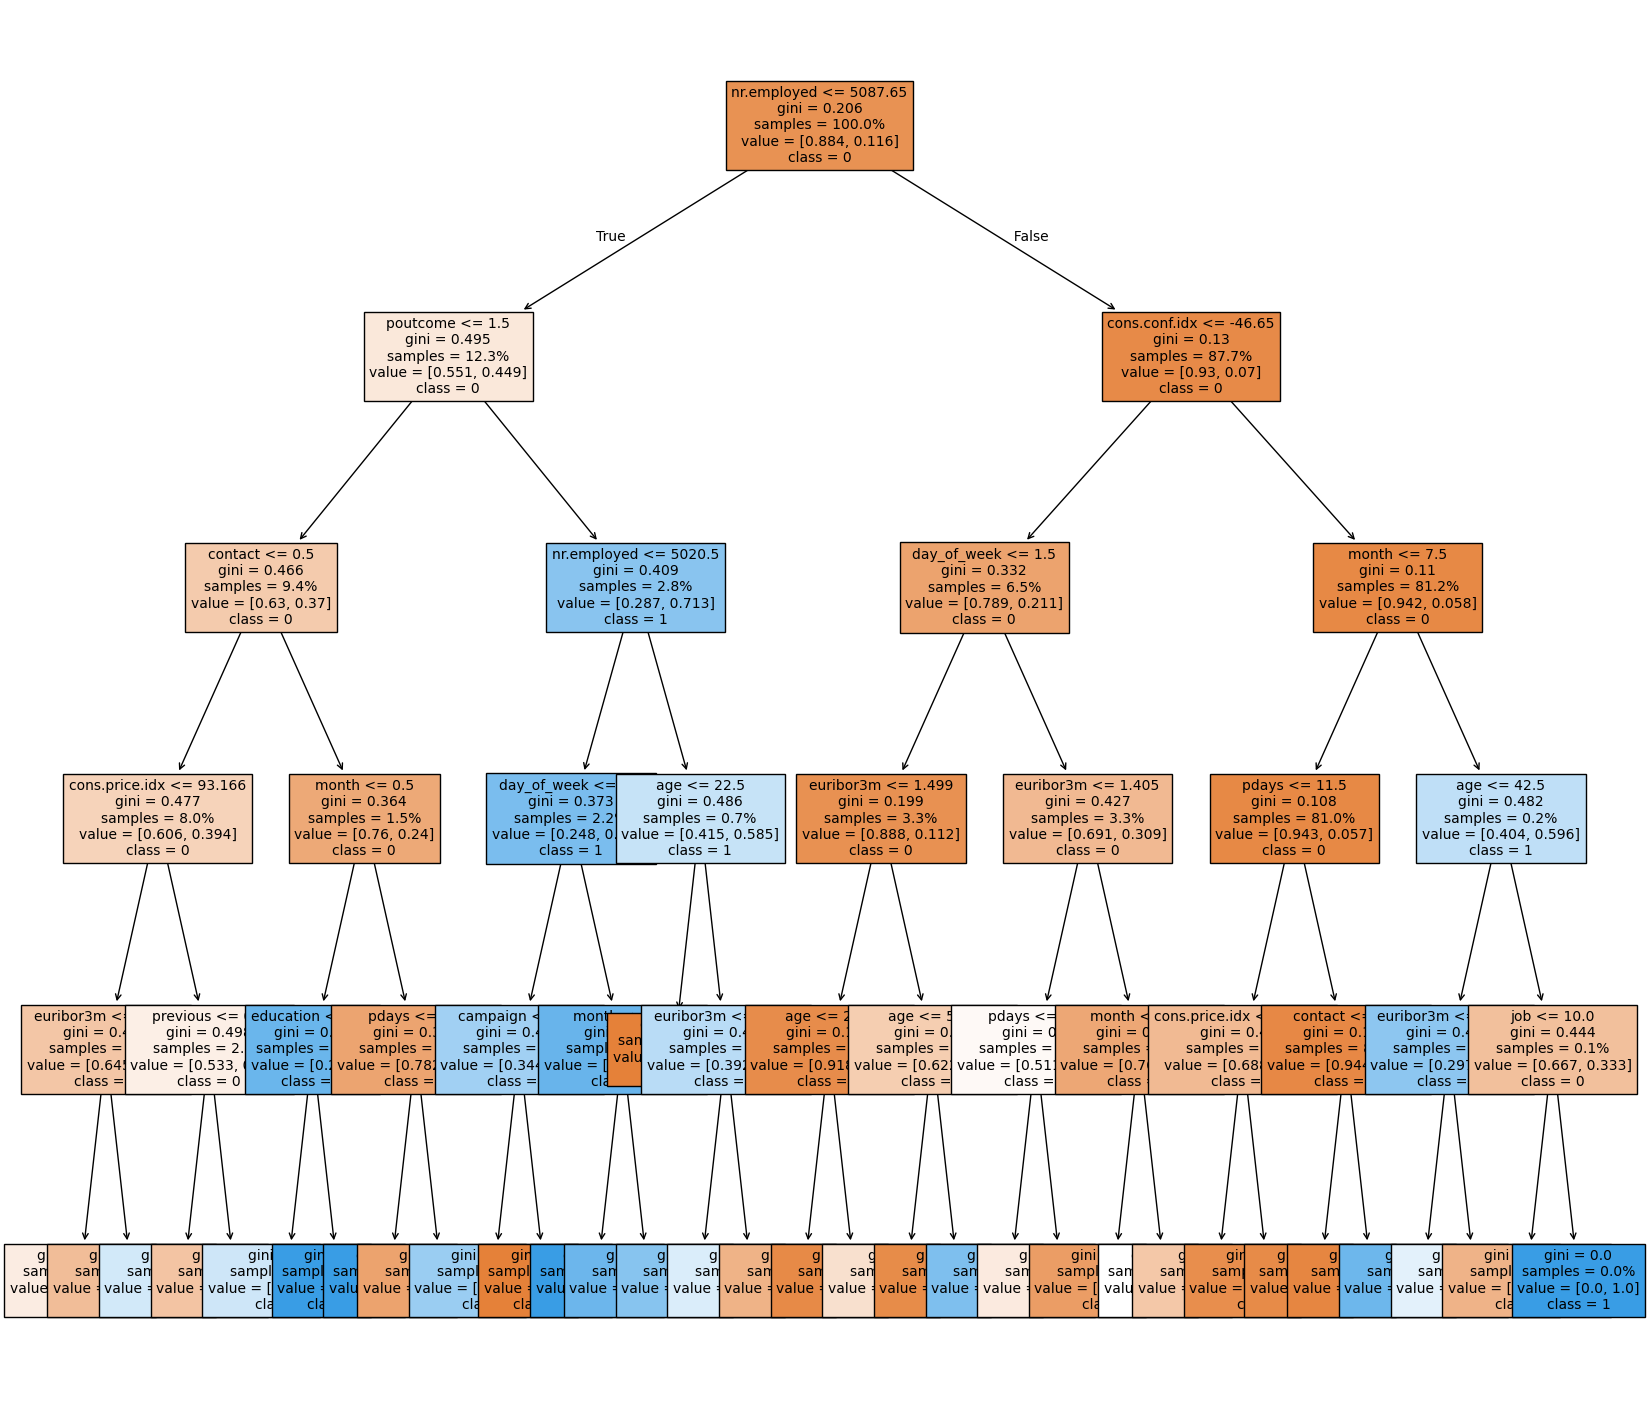

In [80]:
target_names=['0','1']
feature_names=['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']
fig = plt.figure(figsize=(20,18))
_ = tree.plot_tree(dt_default, filled=True, proportion=True, fontsize=10, feature_names=feature_names, class_names=target_names)

In [ ]:
fig = plt.figure(figsize=(20,18))
_ = tree.plot_tree(dt_default, filled=True, proportion=True, fontsize=10, max_depth=2, feature_names=feature_names, class_names=target_names)

In [84]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classifier report after prediction
print(classification_report(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10434
           1       0.67      0.25      0.37      1388

    accuracy                           0.90     11822
   macro avg       0.79      0.62      0.66     11822
weighted avg       0.88      0.90      0.88     11822



In [85]:
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[10259   175]
 [ 1035   353]]
0.8976484520385721


In [86]:
print(pd.crosstab(pd.Series(y_test), pd.Series(y_pred_default), rownames=['Actual'], colnames=['Predicted'], margins=True))

Predicted     0    1   All
Actual                    
0          3110  148  3258
1           123    3   126
All        3233  151  3384


In [ ]:
 # Model -part 2
 ################
#  KNN Model
################

In [98]:

#set k=3
knn_model = KNeighborsClassifier(n_neighbors=3)
#fit the model
knn_model.fit(X_train,y_train)



KNeighborsClassifier(n_neighbors=3)

In [99]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# making predictions
y_pred_default = knn_model.predict(X_test)

# Printing classifier report after prediction
print(classification_report(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93     10434
           1       0.45      0.28      0.34      1388

    accuracy                           0.87     11822
   macro avg       0.68      0.62      0.64     11822
weighted avg       0.85      0.87      0.86     11822



In [100]:
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[9957  477]
 [1004  384]]
0.874725088817459


In [101]:
print(pd.crosstab(pd.Series(y_test), pd.Series(y_pred_default), rownames=['Actual'], colnames=['Predicted'], margins=True))

Predicted     0    1   All
Actual                    
0          3021  237  3258
1           120    6   126
All        3141  243  3384


In [ ]:
################
#  SVM Model
################

In [103]:
#use SVC=support vector for classification
svm_model = svm.SVC()
#fit the model
svm_model.fit(X_train,y_train)

SVC()

In [104]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# making predictions
y_pred_default = svm_model.predict(X_test)

# Printing classifier report after prediction
print(classification_report(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     10434
           1       0.66      0.21      0.32      1388

    accuracy                           0.89     11822
   macro avg       0.78      0.60      0.63     11822
weighted avg       0.88      0.89      0.87     11822



In [105]:
print(pd.crosstab(pd.Series(y_test), pd.Series(y_pred_default), rownames=['Actual'], colnames=['Predicted'], margins=True))

Predicted     0    1   All
Actual                    
0          3130  128  3258
1           124    2   126
All        3254  130  3384


In [106]:
print(accuracy_score(y_test,y_pred_default))

0.8946878700727458


In [107]:
##########################
#  Neural Network Model
##########################

In [109]:
#use MLPClassifier = mult-layer perceptron for Classification - uses Back propagation - default layers = 100
#   max_iters=200
nn_model = nn.MLPClassifier()
#fit the model
nn_model.fit(X_train,y_train)

MLPClassifier()

In [111]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# making predictions
y_pred_default = nn_model.predict(X_test)

# Printing classifier report after prediction
print(classification_report(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93     10434
           1       0.49      0.28      0.36      1388

    accuracy                           0.88     11822
   macro avg       0.70      0.62      0.65     11822
weighted avg       0.86      0.88      0.87     11822



In [112]:
print(accuracy_score(y_test,y_pred_default))

0.881576721366943


In [113]:
#Let's print the ROC chart
from sklearn.metrics import roc_curve, auc

# calculate roc curve
Y_predict_prob = knn_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, Y_predict_prob)
roc_auc = auc(fpr, tpr)
print('AUC = ', roc_auc)
print('tpr = ', tpr)
print('fpt = ', fpr)

AUC =  0.6933416109714473
tpr =  [0.         0.09798271 0.27665706 0.57204611 1.        ]
fpt =  [0.         0.00881733 0.04571593 0.22292505 1.        ]


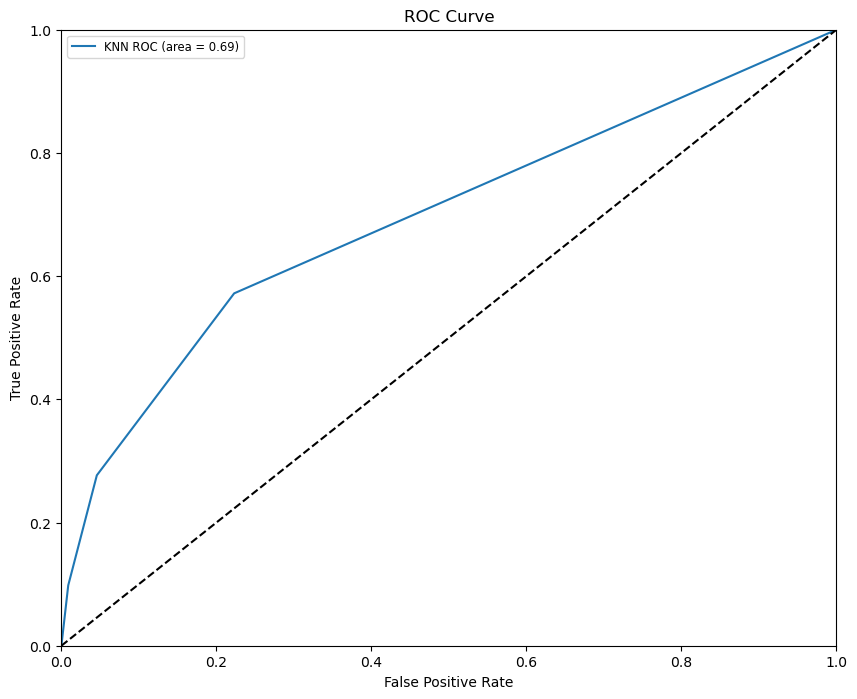

In [114]:
fig = plt.subplots(figsize=(10,8))
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('KNN', roc_auc))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc=0, fontsize='small')
plt.show()

In [116]:
log_cols=["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

classifiers = [
   ('KNN', KNeighborsClassifier(3)),
   ('NB', GaussianNB()),
   ('DT', DecisionTreeClassifier()),
   ('RF', RandomForestClassifier()),
   ('LR', LogisticRegression())]

In [1]:
plt.clf()
plt.figure(figsize=(12,10))

for name, model in classifiers:
   model.fit(X_train, y_train)
   name = model.__class__.__name__

   train_predictions = model.predict(X_test)
   acc = accuracy_score(y_test, train_predictions)
   print (name, "Accuracy=", acc)

   log_entry = pd.DataFrame([[name, acc*100]], columns=log_cols)
#   log = log.append(log_entry)
   log = pd.concat([log, log_entry])

   Y_predict_prob = model.predict_proba(X_test)[:,1]

   fpr, tpr, thresholds = roc_curve(y_test, Y_predict_prob)
   roc_auc = auc(fpr, tpr)

   print(pd.crosstab(pd.Series(y_test), np.array(train_predictions), rownames=['Actual'], colnames=['Predicted'], margins=True))
   print('')

   plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (name, roc_auc))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc=0, fontsize='small')
plt.show()

NameError: name 'plt' is not defined

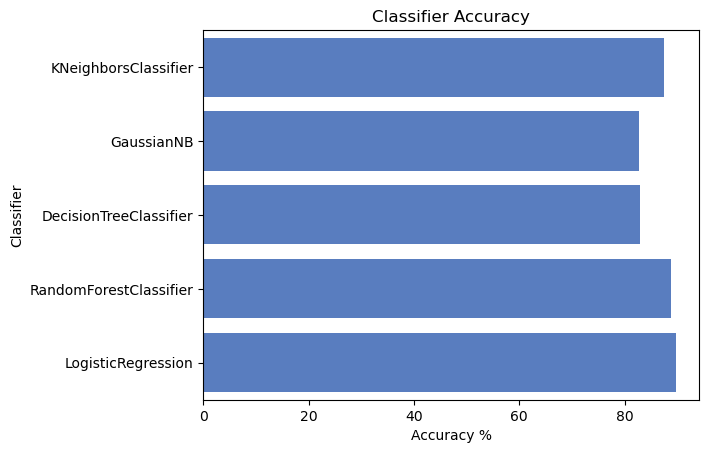

In [118]:


sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()